# Current Distribution Model
### As described in Fuller & Harb Electrochemical Engineering Ch. 5
This model calculates the current distribution throghout the thickness of a porous electrode based on the electrode parameters provided using either linear or Tafel kinetics. Currents plotted are the ionic current flowing through the electrolyte. At the back surface of the electrode (current collector) 100% of the current flows as electronic current, while at the front surface of the electrode (electrolyte) 100% of the current flows as ionic current. Throughout the thickness of the electrode, electron transfer from electrode to electrolyte interconverts the two, with the divergence in either equal and opposite and equal to the reaction rate. The derivative of either ionic or electronic current as a function of distance into the electrode can thus be used to determine where the reaction takes place within the electrode. A derivative of 1 indicates a completely uniform current distribution, where the reaction rate is equal throughout the thickness of the electrode.

In [1]:
from mpmath import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import dataframe_image as dfi
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

## Model Based on Linear Kinetics, using Real Values

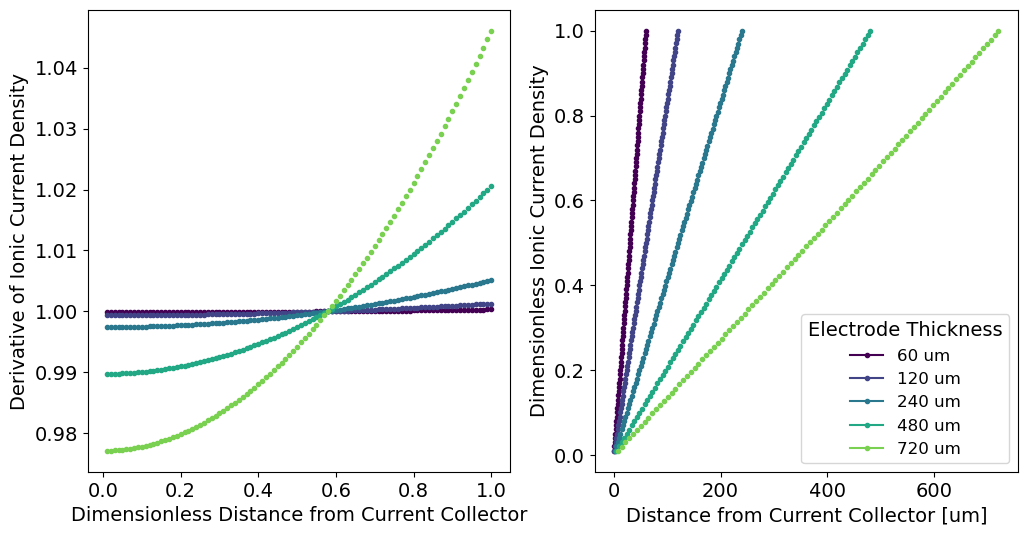

In [2]:
### Define the Variables used in Eq. 5.37 in Fuller and Harb

a = 47600                # m-1 (specific interfacial area)
i0 = 0.856               # A/m2
alpha_a = 0.5            #
alpha_c = 0.5            #
F = 96485                # C/mol
R = 8.314                # J/mol*K
T = 355                  # K
eps = 0.33               # Porosity
sig0 = 10.3e6            # S/m (electronic conductivity)
sig_eff = sig0*(1-eps)   # Effective electronic conductivity
kap0 = 60                # S/m (ionic conductivity)
kap_eff = kap0*eps*0.25  # Effective ionic conductivity
Kr = kap_eff/sig_eff     #


# Create array of colors from viridis colormap
n_datasets = 5
v_colors = [plt.get_cmap('viridis')(i / (n_datasets)) for i in range(n_datasets)]


### Define nu (ratio of kinetic to ohmic resistances)
def nu(L):
    val = np.sqrt((a*i0*(alpha_a + alpha_c)*F*L**2)/(R*T)*((1/sig_eff) + (1/kap_eff)))
    return(val)


### Initialize the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_xlabel('Dimensionless Distance from Current Collector', size=14)
ax1.set_ylabel('Derivative of Ionic Current Density', size=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel('Distance from Current Collector [um]', size=14)
ax2.set_ylabel('Dimensionless Ionic Current Density', size=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
n_datasets = 5
colors = [plt.get_cmap('viridis')(i / (n_datasets)) for i in range(n_datasets)]
labels = ['60 um', '120 um', '240 um', '480 um', '720 um']
### Define L as a parameter
Ls = [60e-6, 120e-6, 240e-6, 480e-6, 720e-6]

### Define z
Zs = np.linspace(0.01, 1, 100)

### Plot di*/dz vs z for all L
n = 0
for L in Ls:
    v = np.sqrt((a*i0*(alpha_a + alpha_c)*F*L**2)/(R*T)*((1/sig_eff) + (1/kap_eff)))
    for z in Zs:
        di_dz = (v*mp.cosh(v*z) + v*Kr*mp.cosh(v*(z-1)))/mp.sinh(v)
        ax1.plot(z, di_dz, marker='.', label = labels[n], color = colors[n])
    n = n + 1
    


### Plot i* vs L for all L
n = 0
for L in Ls:
    v = np.sqrt((a*i0*(alpha_a + alpha_c)*F*L**2)/(R*T)*((1/sig_eff) + (1/kap_eff)))
    for z in Zs:
        i_star = (mp.sinh(v*z) + Kr*mp.sinh(v*(z-1)))/((1 + Kr)*mp.sinh(v))
        ax2.plot(z*L, i_star, marker='.', label = labels[n], color = colors[n])
    n = n + 1
    
    
# Define a function to convert meters to microns for tick labels
def meters_to_microns(x, pos):
    return f'{x * 1e6:g}'  # 'g' removes trailing zeros

# Set the x-axis formatter
formatter = FuncFormatter(meters_to_microns)
ax2.xaxis.set_major_formatter(formatter)


# Creating a unique legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Electrode Thickness', title_fontsize='14', fontsize='12')



fig.savefig('Current_Distribution_Linear_real_L.png')

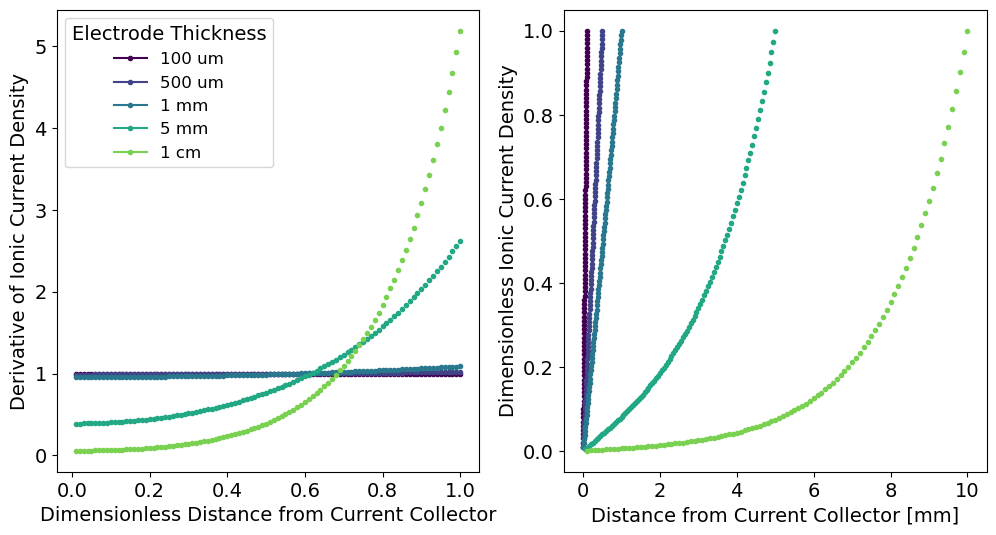

In [3]:
### Define the Variables used in Eq. 5.37 in Fuller and Harb

a = 47600                 # m-1 (specific interfacial area)
i0 = 0.856                   # A/m2
alpha_a = 0.5            #
alpha_c = 0.5            #
F = 96485                # C/mol
R = 8.314                # J/mol*K
T = 355                  # K
eps = 0.33               # Porosity
sig0 = 10.3e6            # S/m (electronic conductivity)
sig_eff = sig0*(1-eps)   # Effective electronic conductivity
kap0 = 60                # S/m (ionic conductivity)
kap_eff = kap0*eps*0.25  # Effective ionic conductivity
Kr = kap_eff/sig_eff     #

### Define nu (ratio of kinetic to ohmic resistances)
def nu(L):
    val = np.sqrt((a*i0*(alpha_a + alpha_c)*F*L**2)/(R*T)*((1/sig_eff) + (1/kap_eff)))
    return(val)


### Initialize the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_xlabel('Dimensionless Distance from Current Collector', size=14)
ax1.set_ylabel('Derivative of Ionic Current Density', size=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel('Distance from Current Collector [mm]', size=14)
ax2.set_ylabel('Dimensionless Ionic Current Density', size=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
n_datasets = 5
colors = [plt.get_cmap('viridis')(i / (n_datasets)) for i in range(n_datasets)]
labels = ['100 um', '500 um', '1 mm', '5 mm', '1 cm', '5 cm', '10 cm']
### Define L as a parameter
Ls = [100e-6, 500e-6, 1e-3, 5e-3, 1e-2]

### Define z
Zs = np.linspace(0.01, 1, 100)


### Plot di*/dz vs z for all L
n = 0
for L in Ls:
    v = nu(L)
    for z in Zs:
        di_dz = (v*mp.cosh(v*z) + v*Kr*mp.cosh(v*(z-1)))/mp.sinh(v)
        ax1.plot(z, di_dz, marker='.', label = labels[n], color = colors[n])
    n = n + 1
    


### Plot i* vs L for all L
n = 0
for L in Ls:
    v = np.sqrt((a*i0*(alpha_a + alpha_c)*F*L**2)/(R*T)*((1/sig_eff) + (1/kap_eff)))
    v = nu(L)
    for z in Zs:
        i_star = (mp.sinh(v*z) + Kr*mp.sinh(v*(z-1)))/((1 + Kr)*mp.sinh(v))
        ax2.plot(z*L, i_star, marker='.', label = labels[n], color = colors[n])
    n = n + 1
    
    
# Define a function to convert meters to microns for tick labels
def meters_to_microns(x, pos):
    return f'{x * 1e3:g}'  # 'g' removes trailing zeros

# Set the x-axis formatter
formatter = FuncFormatter(meters_to_microns)
ax2.xaxis.set_major_formatter(formatter)






# Creating a unique legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), title='Electrode Thickness', title_fontsize='14', fontsize='12')




fig.savefig('Current_Distribution_Linear_high_L.png')

## Model Based on Tafel Kinetics

In [4]:
###  The full set of equations for Tafel Kinetics are much more difficult to solve, 
#    as it involves non-linear, transcendental equations and numerical mehtods,
#    and a full model was beyond the scope of this paper.
#
#    However, the critical parameter, detla, that determines the shape of the current
#    distribution is simple, and can be solved for as a function of electrode thickness
#    and the ionic and electronic conductivities.
#
#    Here we show that for the values of L, kappa, and sigma found in our system,
#    delta is >1, indicating a highly uniform current distribution. We also show that
#    for systems with lower ionic conductivities and thicker electrodes, delta > 1 and 
#    thus a non-uniform current distribution.


alpha_c = 0.5            #
F = 96485                # C/mol
R = 8.314                # J/mol*K
T = 355                  # K
I = 1000                 # A/m2
eps = 0.33               # Porosity
sig0 = 10.3e6            # S/m (electronic conductivity)
sig_eff = sig0*(1-eps)   # Effective electronic conductivity
kap0 = 60                # S/m (ionic conductivity)
kap_eff = kap0*eps       # Effective ionic conductivity
L = 720e-6               # Electrode thickness (m)

delta1 = (alpha_c*F*I*L)/(R*T)*((1/kap_eff)+(1/sig_eff))

# increase L
kap0 = 60              # S/m (ionic conductivity)
kap_eff = kap0*eps*0.25  # Effective ionic conductivity
L = 5e-3               # Electrode thickness (m)

delta2 = (alpha_c*F*I*L)/(R*T)*((1/kap_eff)+(1/sig_eff))

print('Delta 1 = ', delta1)
print('Delta 2 = ', delta2)

Delta 1 =  0.5943742475929853
Delta 2 =  16.51036023847968
